# 2487-2223 Machine Learning Assignment 1



## Question 1 (25 points) - Zestimate this House

Purchasing a house is a very big decision for most of us. Companies such as Zillows collected tons of data regarding the listing and sold price of American houses and build the predictive model, named *Zestimate*. You are expected to build a model similar as Zestimate to predict house price in Boston. 

![zestimate](https://i0.wp.com/www.housesoldeasy.com/wp-content/uploads/Screen-Shot-2016-08-15-at-7.22.09-PM.png?resize=300%2C258&ssl=1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
import warnings 
warnings.filterwarnings('ignore')


In [2]:
### DON'T MODIFY - LOAD DATA ### 

data_url = "http://lib.stat.cmu.edu/datasets/boston" 
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # FEATURES 
y = raw_df.values[1::2, 2] # TARGET VARIABLE
assert X.shape[0] == y.shape[0], 'Mismatch in number of examples.'
print('Data loaded correctly.')
print('Features: X. Target variable (price): y.')
print('X shape: ',X.shape, 'y shape: ', y.shape)
### END ###

Data loaded correctly.
Features: X. Target variable (price): y.
X shape:  (506, 13) y shape:  (506,)


The columns:
| Index | Variable | Description                                                 |
|-------|----------|-------------------------------------------------------------|
| 0     | CRIM     | per capita crime rate by town                              |
| 1     | ZN       | proportion of residential land zoned for lots over 25,000 sq.ft. |
| 2     | INDUS    | proportion of non-retail business acres per town             |
| 3     | CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| 4     | NOX      | nitric oxides concentration (parts per 10 million)           |
| 5     | RM       | average number of rooms per dwelling                         |
| 6     | AGE      | proportion of owner-occupied units built prior to 1940       |
| 7     | DIS      | weighted distances to five Boston employment centres        |
| 8     | RAD      | index of accessibility to radial highways                    |
| 9     | TAX      | full-value property-tax rate per $10,000                     |
| 10    | PTRATIO  | pupil-teacher ratio by town                                  |
| 11    | B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| 12    | LSTAT    | % lower status of the population                             |
| 13    | MEDV     | Median value of owner-occupied homes in $1000's              |

Label = y = MEDV (price)


#### Question 1.1 (5 points) 
Create train and test set, each contains 80% and 20% of the dataset, respectively, using *train_test_split* function in scikit-learn. Train a linear model on the train set and evaluate on the test set, report the training error and test error, respectively (as mean squared error).

In [3]:
seed = 13

# create linear regression object
reg = LinearRegression()

# split data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

# train the model with training set to find the best parameters for the best-fitting line
reg.fit(X_train, y_train)

# make predictions with train set and compute MSE on train data
y_pred_test = reg.predict(X_train)
error_train = mean_squared_error(y_train, y_pred_test)
    
# make predictions with test data and compute MSE on test data (unseen)
y_pred = reg.predict(X_test)
error_test = mean_squared_error(y_test, y_pred)

print('Training error:', error_train) # how well the model fits the training data
print('Test error:', error_test) # how well the model can predict new, unseen data

Training error: 21.555648194527308
Test error: 24.318238309170436


#### Question 1.2 (5 points)

Perform a 10-fold cross-validation on the whole data set. Show the averaged mean sqaured error on both train and test set at each fold. Explain your findings.

In [4]:
# perform 10-fold cross-validation on dataset with MSE
scores = cross_validate(reg, X, y, scoring='neg_mean_squared_error', cv=10, return_train_score = True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE = scores["train_score"] * -1  # The score array for train scores on each cv split
test_MSE = scores["test_score"] * -1    # The score array for test scores on each cv split

# create dataframe containing the average MSE for train and test set for each fold
mse_df = pd.DataFrame({'train_MSE': train_MSE, 'test_MSE': test_MSE})
mse_df

,train_MSE,test_MSE
0,23.363228,9.286947
1,22.882034,14.151283
2,23.216075,14.073606
3,20.771703,35.206924
4,21.335426,31.885117
5,22.363700,19.835878
6,23.327221,9.947269
7,11.959197,168.375380
8,21.586295,33.329745
9,23.189043,10.960411


In [5]:
print("Average training error over 10-fold cross-validation:", train_MSE.mean())
print("Average testing error over 10-fold cross-validation:", test_MSE.mean())

Average training error over 10-fold cross-validation: 21.39939241710581
Average testing error over 10-fold cross-validation: 34.70525594452485


Findings: the model's performance is not consistent across folds. The test error is in most folds smaller than the training error, which is an indicator that in those folds the model does generalize well to new data. 
<span style="color:red; font-size:20px">Do it later</span>


#### Question 1.3 (5 points) 
 
Add 2-degree squared polynomial features (with no interactions) and perform 10-fold cross-validation on the whole data set. Show the mean sqaured error on both train and test set at each fold. Explain your findings.

Hint: you may use sklearn.preprocessing.PolynomialFeatures and check how it produces the polynomial features with/without interaction terms.

#####  Trying out behavior of interaction terms

In [6]:
X.shape

(506, 13)

In [7]:
poly_interaction = PolynomialFeatures(degree = 2, interaction_only = True)
X_interaction = poly_interaction.fit_transform(X)
print(X_interaction.shape)
print("Only interaction features (the product of different input features) and the terms with power 1 are produced")

(506, 92)
Only interaction features (the product of different input features) and the terms with power 1 are produced


In [8]:
poly_no_interaction = PolynomialFeatures(degree = 2, interaction_only = False)
X_no_interaction = poly_no_interaction.fit_transform(X)
print(X_no_interaction.shape)
print("Includes 78 interaction features, 13 features with power of 1, 13 features with power of 2, and intercept term")

(506, 105)
Includes 78 interaction features, 13 features with power of 1, 13 features with power of 2, and intercept term


In [9]:
new_X = np.hstack((X, X**2))
new_X.shape

(506, 26)

Note: to achieve no interaction, one must transform X by using np.hstack. I understood it in a way that you want no interaction features at all.

In [10]:
# save an instance of PolynomialFeatures with the given degree
polynomial_features = PolynomialFeatures(degree = 2, interaction_only = False)

# create polynomial regression model
model = LinearRegression()

# fit model to data, using the 
model.fit(new_X, y)

# perform 10-fold cross-validation on dataset with MSE
scores_poly = cross_validate(model, new_X, y, scoring='neg_mean_squared_error', cv=10, return_train_score = True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE_poly = scores_poly["train_score"] * -1 
test_MSE_poly = scores_poly["test_score"] * -1 

# create dataframe containing the average MSE for train and test set for each fold
mse_df_poly = pd.DataFrame({'train_MSE': train_MSE_poly, 'test_MSE': test_MSE_poly})
mse_df_poly


,train_MSE,test_MSE
0,14.980271,10.091861
1,14.969661,8.791095
2,15.204169,11.458221
3,13.665059,22.518524
4,14.438738,14.223065
5,14.940824,8.780146
6,14.859624,12.953433
7,7.419826,104.037379
8,14.605032,13.610872
9,14.050919,50.771795


In [11]:
print("Average training error over 10-fold cross-validation:", train_MSE_poly.mean())
print("Average testing error over 10-fold cross-validation:", test_MSE_poly.mean())

Average training error over 10-fold cross-validation: 13.913412317032257
Average testing error over 10-fold cross-validation: 25.72363917701756


<span style="color:red; font-size:20px">Explain your findings.</span>

#### Question 1.4 (10 points)

Perform cross-validation using ridge regression and lasso regression on different feature combinations (linear features vs. polynomial features obtained earlier respectively. Explain which method works better in this case. Check the coefficients and explain the differences between ridge regression and lasso regression.

##### Linear features

In [12]:
# Ridge Regression
X_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

ridge_reg = Ridge()
cv_scores_rl = cross_validate(ridge_reg, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE_rl = cv_scores_rl["train_score"] * -1 
test_MSE_rl = cv_scores_rl["test_score"] * -1 

print("Ridge Regression - Linear Features:")
print("Average training error over 10-k cv with ridge regression (linear):", train_MSE_rl.mean())
print("Average testing error over 10-k cv with ridge regression (linear):", test_MSE_rl.mean())

# Create dataframe with feature names and coefficients
ridge_reg.fit(X_train, y_train)
ridge_coefs = pd.DataFrame({'feature': X_names, 'coefficient': ridge_reg.coef_})
print("Coefficients")
print(ridge_coefs)

Ridge Regression - Linear Features:
Average training error over 10-k cv with ridge regression (linear): 21.58114506497026
Average testing error over 10-k cv with ridge regression (linear): 34.07824620925931
Coefficients
    feature  coefficient
0      CRIM    -0.150575
1        ZN     0.058798
2     INDUS    -0.035243
3      CHAS     2.424039
4       NOX    -8.099813
5        RM     3.543438
6       AGE    -0.002831
7       DIS    -1.472918
8       RAD     0.351650
9       TAX    -0.015446
10  PTRATIO    -0.821765
11        B     0.007758
12    LSTAT    -0.570019


In [13]:
# Lasso regression
lasso_reg = Lasso(max_iter=5000)

cv_scores_ll = cross_validate(lasso_reg, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE_ll = cv_scores_ll["train_score"] * -1 
test_MSE_ll = cv_scores_ll["test_score"] * -1 

print("\nLasso Regression - Linear Features:")
print("Average training error over 10-k cv with lasso regression (linear):", train_MSE_ll.mean())
print("Average testing error over 10-k cv with lasso regression (linear):", test_MSE_ll.mean())

lasso_reg.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'feature': X_names, 'coefficient': lasso_reg.coef_})
print("Coefficients")
print(lasso_coefs)


Lasso Regression - Linear Features:
Average training error over 10-k cv with lasso regression (linear): 26.446016110077032
Average testing error over 10-k cv with lasso regression (linear): 34.46408458830231
Coefficients
    feature  coefficient
0      CRIM    -0.100439
1        ZN     0.061775
2     INDUS    -0.000000
3      CHAS     0.000000
4       NOX    -0.000000
5        RM     0.737827
6       AGE     0.025951
7       DIS    -0.752248
8       RAD     0.334002
9       TAX    -0.018118
10  PTRATIO    -0.694069
11        B     0.006781
12    LSTAT    -0.793181


##### Polynomial features

In [14]:
# Ridge Regression
cv_scores_rp = cross_validate(ridge_reg, new_X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE_rp = cv_scores_rp["train_score"] * -1 
test_MSE_rp = cv_scores_rp["test_score"] * -1 

print("Ridge Regression - Polynomial Features:")
print("Average training error over 10-k cv with ridge regression (poly):", train_MSE_rp.mean())
print("Average testing error over 10-k cv with ridge regression (poly):", test_MSE_rp.mean())

Ridge Regression - Polynomial Features:
Average training error over 10-k cv with ridge regression (poly): 14.201739336116793
Average testing error over 10-k cv with ridge regression (poly): 26.942921093602394


In [15]:
# Lasso regression
cv_scores_lp = cross_validate(lasso_reg, new_X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE_lp = cv_scores_lp["train_score"] * -1 
test_MSE_lp = cv_scores_lp["test_score"] * -1 

print("\nLasso Regression - Polynomial Features:")
print("Average training error over 10-k cv with lasso regression (poly):", train_MSE_lp.mean())
print("Average testing error over 10-k cv with lasso regression (poly):", test_MSE_lp.mean())



Lasso Regression - Polynomial Features:
Average training error over 10-k cv with lasso regression (poly): 18.548501008872663
Average testing error over 10-k cv with lasso regression (poly): 30.776932337350466


<span style="color:red; font-size:20px">Explain which method works better in this case. Check the coefficients and explain the differences between ridge regression and lasso regression..also print the coefficients for poly!</span>

## Question 2 (25 points) - Cancer Detection

Given a dataset with features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which describes characteristics of the cell nuclei present in the image, let's try to predict whether the patients are diagnosed as Malignant (M) or Benign (B).

In [16]:
# LOAD DATA 

from sklearn.datasets import load_breast_cancer
"""
DOCS:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
"""
X, y = load_breast_cancer(return_X_y=True)

#### Question 2.1 (5 points) 
Use logistic regression to train the dataset through cross-validation, report the score on train and test set, respectively. Explain your findings.

In [17]:
# instantiate the model
logreg = LogisticRegression(max_iter=10000)

# perform 10-fold cross-validation on dataset with recall
scores_log = cross_validate(logreg, X, y, scoring='recall', cv=10, return_train_score = True)

# get train and test recall from scores dict
train_MSE_log = scores_log["train_score"]
test_MSE_log = scores_log["test_score"]

print("Mean Recall on Training set:", train_MSE_log.mean())
print("Mean Recall on Testing set:", test_MSE_log.mean())

Mean Recall on Training set: 0.9754116599910991
Mean Recall on Testing set: 0.9721428571428572


<span style="color:red; font-size:20px">Explain your findings</span>

#### Question 2.2 (5 points) 
By default, sklearn's logistic regression uses the L2 regularization. Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.

In [18]:
# instantiate the model without any regularization
logreg2 = LogisticRegression(max_iter=10000, penalty='none', solver="saga")

# perform 10-fold cross-validation on dataset with recall
scores_log2 = cross_validate(logreg2, X, y, cv=10, scoring='recall', return_train_score=True)

# print train and test recall from scores dict
print("Mean Recall on Training set:", scores_log2["train_score"].mean())
print("Mean Recall on Testing set:", scores_log2["test_score"].mean())

Mean Recall on Training set: 0.964209283876086
Mean Recall on Testing set: 0.9638095238095238


<span style="color:red; font-size:20px">Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.</span>

#### Question 2.3 (15 points) 
Check how many Benign and Malignant cases in the dataset. What might be the problem if we use the default score of the logistic regression cross-validation? Now adjust the class weight of M and L and retrain the model again to bias toward Malignant, using the relative weight of M and L as 2:1. What about the relaive weight to be 5:1, or 10:1? Explain what you find.

Hint: you can use LogisticRegressionCV to combine LogisticRegression and cross-validation. 

##### Finding out how many benign and malignant cases are in the dataset

see class distribution as stated here: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [19]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 212, 1: 357}

0 = negative class = Malignant (=Cancer) = 212

1 = positive class = Benign = 357

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count number of samples in each class
n_samples = y.shape[0]
n_malignant = sum(y == 0) # 0 = negative class = Malignant (=Cancer)
n_benign = sum(y == 1) # 1 = positive class = Benign

print(f"Number of malignant cases: {n_malignant} ({n_malignant / n_samples:.2%})")
print(f"Number of benign cases: {n_benign} ({n_benign / n_samples:.2%})")

# Define logistic regression model with class weights
clf_2to1 = LogisticRegressionCV(class_weight={0: 1, 1: 2}, cv=10, max_iter=10000)
clf_5to1 = LogisticRegressionCV(class_weight={0: 1, 1: 5}, cv=10, max_iter=10000)
clf_10to1 = LogisticRegressionCV(class_weight={0: 1, 1: 10}, cv=10, max_iter=10000)

# train model with 2:1 class weight ratio and evaluate model on test set
clf_2to1.fit(X_train, y_train)
score_2to1 = clf_2to1.score(X_test, y_test)
print(f"Score with 2:1 class weight ratio: {score_2to1:.2f}")

# Train model with 5:1 class weight ratio and evaluate model on test set
clf_5to1.fit(X_train, y_train)
score_5to1 = clf_5to1.score(X_test, y_test)
print(f"Score with 5:1 class weight ratio: {score_5to1:.2f}")

# Train model with 10:1 class weight ratio and evaluate model on test set
clf_10to1.fit(X_train, y_train)
score_10to1 = clf_10to1.score(X_test, y_test)
print(f"Score with 10:1 class weight ratio: {score_10to1:.2f}")

Number of malignant cases: 212 (37.26%)
Number of benign cases: 357 (62.74%)
Score with 2:1 class weight ratio: 0.96
Score with 5:1 class weight ratio: 0.97
Score with 10:1 class weight ratio: 0.99


<span style="color:red; font-size:20px">What might be the problem if we use the default score of the logistic regression cross-validation? Now adjust the class weight of M and L and retrain the model again to bias toward Malignant, using the relative weight of M and L as 2:1. What about the relaive weight to be 5:1, or 10:1? Explain what you find..</span>

## Question 3 (50 points) - Call Me Maybe? 



![telemarketing](https://neilpatel.com/wp-content/uploads/2019/08/profissional-de-telemarketing-sorridente.jpeg)

Telemarketing is a method of direct marketing in which a salesperson solicits prospective customers to buy products or services over the phone. It has become one of the most widely used marketing campaign methods to engage with customers with product and service opportunity. We have collected real data from a Portuguese retail bank, from May 2008 to June 2013 with thousands of phone contacts. 




The current practice of many data teams is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability. Note that telemarketing may incur some costs for contacting the customer, thus the success (i.e., the generated profit) of using machine learning model requries further inspection.  As the data scientist, you are asked to build a propensity model to evaluate the effectiveness of their telemarketing campaigns, i.e. whether the customer subscribed to the term deposit.  

**Telemarketing Dataset (bank.csv)**
All customers are contained in the file bank.csv. Each line of this file after the header row represents one customer of the Portuguese bank, and has the following format:

### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'primary', 'secondary', 'tertiary')
- balance: amcount of bank account balance
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
- day: last contact day of month
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y - has the client subscribed a term deposit? (binary: 'yes','no')


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers. If any model invovles random_state, set it to be 42.

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

Only 11.5% (521/4521) of customers subscribed to a term deposit -> unbalanced data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

### Question 3.1 (15 points)

Split the data into 80% training set and 20% test set. **Build a pipeline to preprocess the indicated numerical features and categorical features separately**. For numerical features 'balance', 'campaign', standardize these features. For categorical features 'job', 'marital', 'education', 'default', transform them through one-hot encoding. For the numeric feature 'age', convert it into the quartile categorical variable and transform it through one-hot encoding. 

Train a Logistic regression model with L2 regularization using 5-fold cross validation (default hyperparameter) on the train set and show the accuracy, precision, recall on the train set. Explain whether the model is useful for the bank to identify the customer propensity.

In [6]:
# replaces the values 'yes' and 'no' in the y variable with 1 and 0 respectively
X = bank.drop('y', axis = 1)
y = bank["y"] .replace({"yes": 1, "no": 0})

In [7]:
# visualization of pipeline
from sklearn import set_config
set_config(display="diagram")

Each subpipeline starts with a selector transformer: it simply transforms the data by selecting the desired attributes (numerical or categorical), dropping the rest, and converting the resulting DataFrame to a NumPy array.

In [8]:
# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [9]:
seed = 42

# define attributes
num_attribs = ["balance", "campaign"]
cat_attribs = ["job", "marital", "education", "default"]
age_attribs = ["age"]

# define pipeline to apply feature scaling to numerical features
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler())
])

# define pipeline to apply one-hot encoding to categorical values
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

# define pipeline to convert age into the quartile categorical variable and transform it through one-hot encoding. 
age_pipeline = Pipeline([
        ('selector', DataFrameSelector(age_attribs)),
        ('age_quantile_transform', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

# apply different operations on num and cat by combining pipelines with ColumnTransformer
preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
        ("age", age_pipeline, age_attribs)
    ])

X_processed = preprocessing.fit_transform(bank)
X_processed

array([[ 0.12107186, -0.57682947,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1186443 , -0.57682947,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.02414438, -0.57682947,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.37472364,  2.63916021,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.09492484,  0.38796743,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.09525714, -0.2552305 ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [10]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['balance',
                                                                                     'campaign'])),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['balance', 'campaign']),
                                ('cat',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['job',
                                                                                     'marital',
                                                                                     'education',
                                                                                     'default'])),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['job', 'marital', 'education', 'default']),
                                ('age',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['age'])),
                                                 ('age_quantile_transform',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4)),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['age'])])

In [11]:
# split data into training and testing data sets
# use processed X
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state=seed)

# instantiate the model
l2_reg = LogisticRegression(penalty='l2', random_state=seed)

# perform cross-validation on the training data
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': 'recall'
}
cv_scores = cross_validate(l2_reg, X_train, y_train, cv=5, scoring=scoring)
cv_scores

{'fit_time': array([0.05232596, 0.03618884, 0.03061199, 0.03147125, 0.02979207]),
 'score_time': array([0.00478411, 0.00384593, 0.00386405, 0.00396991, 0.00317216]),
 'test_accuracy': array([0.88259669, 0.88381743, 0.88381743, 0.8824343 , 0.8824343 ]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.])}

In [12]:
# display mean accuracy, precision, and recall over the 5 folds
print("Accuracy:", cv_scores['test_accuracy'].mean())
print("Precision:", cv_scores['test_precision'].mean())
print("Recall:", cv_scores['test_recall'].mean())

Accuracy: 0.8830200285795069
Precision: 0.0
Recall: 0.0


<span style="color:red; font-size:20px">EXPLAIN...!!</span>

### Question 3.2 (10 points)

Now add more features to the model to see if we can improve the performance (categorical features: 'housing', 'loan' and numerical features: 'day', 'duration'). Use the preprocess pipeline built previously to transform the data. 

Train a Logistic regression model with L1 regularization using 5-fold cross validation on the train set, by fine-tuning the hyperparameter alpha, i.e. the regularization strength from [0.001, 0.01, 0.1, 1]. Choose the correct score function that reflect the current data team's practice. Report the average score with the best hyperparameter. Does model performance improve, and if so, how?

Expalin whether all features are useful for making prediction and why. List top 5 features that contribute to the prediction the most. If not all features are useful, list those unuseful features.

In [13]:
# add more attributes
num_attribs2 = ["balance", "campaign", "day", "duration"]
cat_attribs2 = ["job", "marital", "education", "default", "housing", "loan"]
age_attribs2 = ['age']

# define pipeline to apply feature scaling to numerical features
num_pipeline2 = Pipeline([
        ('selector', DataFrameSelector(num_attribs2)),
        ('std_scaler', StandardScaler())
])

# define pipeline to apply one-hot encoding to categorical values
cat_pipeline2 = Pipeline([
        ('selector', DataFrameSelector(cat_attribs2)),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

# define pipeline to convert age into the quartile categorical variable and transform it through one-hot encoding. 
age_pipeline2 = Pipeline([
        ('selector', DataFrameSelector(age_attribs2)),
        ('age_quantile_transform', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

# apply different operations on num, cat, and age by combining pipelines with ColumnTransformer
preprocessing2 = ColumnTransformer([
        ("num", num_pipeline2, num_attribs2),
        ("cat", cat_pipeline2, cat_attribs2),
        ("age", age_pipeline2, age_attribs2)
    ])

X_processed2 = preprocessing2.fit_transform(bank)
X_processed2.shape

(4521, 33)

In [14]:
preprocessing2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['balance',
                                                                                     'campaign',
                                                                                     'day',
                                                                                     'duration'])),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['balance', 'campaign', 'day', 'duration']),
                                ('cat',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['job',
                                                                                     'marital',
                                                                                     'education',
                                                                                     'default',
                                                                                     'housing',
                                                                                     'loan'])),
                                                 ('ca...coder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan']),
                                ('age',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['age'])),
                                                 ('age_quantile_transform',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4)),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['age'])])

In [15]:
# split data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X_processed2, y, test_size = 0.2, random_state=seed)

# instantiate the model
l1_reg = LogisticRegression(penalty='l1', random_state=seed, solver='liblinear')

# Use the GridSearchCV object with cross_val_score to perform cross-validation and hyperparameter tuning
params = {'C': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(l1_reg, params, cv=5, scoring="precision", refit=True).fit(X_train, y_train)

# display best hyperparameters and average score on the test set
print("Best hyperparameter alpha:", grid_search.best_params_)
print("Mean cross-validated score of the best estimator:", grid_search.best_score_)

print("\n"+"Coefficients")
print(grid_search.best_estimator_.coef_)

Best hyperparameter alpha: {'C': 0.1}
Mean cross-validated score of the best estimator: 0.5955192189547527

Coefficients
[[ 0.02060661 -0.23432841  0.          0.965484    0.         -0.340325
   0.          0.          0.          0.20871636  0.          0.
   0.          0.          0.          0.          0.         -0.20962352
   0.          0.         -0.0162182   0.17158427  0.         -0.34468764
   0.          0.         -0.74461899  0.         -0.51525403  0.
   0.         -0.10028963  0.        ]]


In [16]:
# get feature names for numerical attributes
num_features = np.array(num_attribs2)

# get feature names for categorical attributes
cat_encoder = preprocessing2.named_transformers_['cat'].named_steps['cat_encoder']
cat_features = cat_encoder.get_feature_names(cat_attribs2)

# get feature names for age attribute
age_encoder = preprocessing2.named_transformers_['age'].named_steps['cat_encoder']
age_features = age_encoder.get_feature_names(age_attribs2)

# concatenate all feature names
feature_names = np.concatenate((num_features, cat_features, age_features), axis=0)
feature_names

array(['balance', 'campaign', 'day', 'duration', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'age_0.0', 'age_1.0', 'age_2.0', 'age_3.0'], dtype=object)

The larger the magnitude of the coefficient (whether positive or negative), the more important the corresponding feature is for predicting the target variable.

In [18]:
coef = grid_search.best_estimator_.coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coef, 'coef_abs': np.abs(coef) })
coef_df_sorted = coef_df.sort_values('coef_abs', ascending=False)

coef_df_sorted

,feature,coef,coef_abs
3,duration,0.965484,0.965484
26,housing_yes,-0.744619,0.744619
28,loan_yes,-0.515254,0.515254
23,default_no,-0.344688,0.344688
5,job_blue-collar,-0.340325,0.340325
1,campaign,-0.234328,0.234328
17,marital_married,-0.209624,0.209624
9,job_retired,0.208716,0.208716
21,education_tertiary,0.171584,0.171584
31,age_2.0,-0.100290,0.100290


The top 5 features

In [19]:
coef_df_sorted.head(5)

,feature,coef,coef_abs
3,duration,0.965484,0.965484
26,housing_yes,-0.744619,0.744619
28,loan_yes,-0.515254,0.515254
23,default_no,-0.344688,0.344688
5,job_blue-collar,-0.340325,0.340325


Not all features are useful

In [20]:
coef_df_sorted[coef_df_sorted["coef"] == 0]

,feature,coef,coef_abs
25,housing_no,0.0,0.0
24,default_yes,0.0,0.0
19,education_primary,0.0,0.0
22,education_unknown,0.0,0.0
27,loan_no,0.0,0.0
29,age_0.0,0.0,0.0
30,age_1.0,0.0,0.0
16,marital_divorced,0.0,0.0
18,marital_single,0.0,0.0
15,job_unknown,0.0,0.0


The current practice of many data teams is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability.

it is likely that the data team is interested in maximizing precision, as targeting customers with a high probability of adopting the product is likely to be costly, and they want to minimize the number of customers who are targeted but do not end up adopting the product.


The model performance did improve

In [21]:
print("Precision model before:", cv_scores['test_precision'].mean())

Precision model before: 0.0


In [22]:
print("Precision current model:", grid_search.best_score_)

Precision current model: 0.5955192189547527


Expalin whether all features are useful for making prediction and why. List top 5 features that contribute to the prediction the most. If not all features are useful, list those unuseful features.

### Question 3.3 (10 points)

Now use the best model found in the cross-validation to predict the test set, show the obtained confusion matrix. Assume that targeting each customer would cost 10 euros and if the customer subscribe, the company would earn 50 euros. If we perform targeted telemarketing to all customers that are predicted to subscribe in the test set, what's the resulting profit?

In [23]:
grid_search.best_estimator_

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [24]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

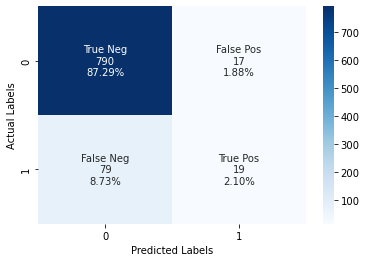

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

Assume that targeting each customer would cost 10 euros and if the customer subscribe, the company would earn 50 euros. If we perform targeted telemarketing to all customers that are predicted to subscribe in the test set, what's the resulting profit?

In [27]:
FN = cf_matrix[0][0]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]

In [28]:
n_targeted = TP + FP # target all customers that were predicted to subscribe
n_subscribers = TP # the FN will not be targeted
targeting_cost = 10
subscription_earn = 50

revenue = n_subscribers * subscription_earn
cost = n_targeted * targeting_cost

profit = revenue - cost
print(f"The profit will be {profit} €")

The profit will be 590 €


### Question 3.4 (10 points)

Now adjust the decision threshold in order to optimize the obtained profit. What would be the resulting threshold and profit? Is the propensity model built based on the targeting predicted probability useful in terms of profit maximizing? Explain.

Default decision threshold = 0.5

In [42]:
from sklearn.metrics import precision_recall_curve

# Create an array of possible thresholds
y_pred_positive = best_model.predict_proba(X_test)[:, 1]

# takes the true output values and the probabilities for the positive class as input and returns the precision, recall and threshold values.
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_positive)

(0.0, 1.0, 0.0, 1.0)

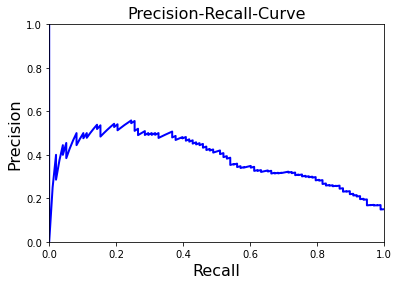

In [44]:
# Plot precision-recall-curve
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title("Precision-Recall-Curve", fontsize=16)
plt.axis([0, 1, 0, 1])

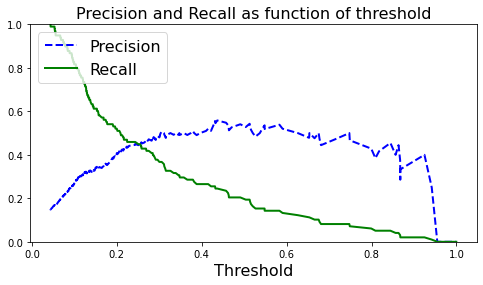

In [61]:
# plot precision and recall as a function of threshold

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # remove last value from precisions and recalls array to get cleaner plot
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.title("Precision and Recall as function of threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [48]:
df_prec_recall = pd.DataFrame({"threshold" : thresholds, "precision" : precisions[:-1], "recall": recalls[:-1]})
df_prec_recall

,threshold,precision,recall
0,0.043684,0.149847,1.000000
1,0.043698,0.148545,0.989796
2,0.043914,0.148773,0.989796
3,0.044042,0.149002,0.989796
4,0.044183,0.149231,0.989796
...,...,...,...
649,0.924749,0.400000,0.020408
650,0.941895,0.250000,0.010204
651,0.955003,0.000000,0.000000
652,0.964185,0.000000,0.000000


In [67]:
df_prec_recall[(df_prec_recall["precision"] == df_prec_recall["recall"]) & (df_prec_recall["precision"] != 0)]

,threshold,precision,recall
556,0.253801,0.44898,0.44898


returns a boolean array with True for samples whose probability of belonging to the positive class is greater than the threshold and False for those whose probability is less than or equal to the threshold.

Finally, it converts the boolean array to integers by multiplying it by 1 and returns it as the predicted classes for the test set.

In [74]:
def pos_prediction(X, threshold):
    y_pred_pos = best_model.predict_proba(X)[:, 1]
    return (y_pred_pos > threshold).astype(int)

In [76]:
pos_prediction(X_test, 0.5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
thresholds = np.arange(0.0, 1.0, 0.01)

# Create an empty dataframe to store results
profits_df = pd.DataFrame(columns=['Threshold', 'Profit'])

# Calculate profit for each threshold
for t in thresholds:
    y_pred_custom = custom_predict(X_test, t)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
    profit = (tp * 50) - ((tp + fp) * 10)
    profits_df = profits_df.append({'Threshold': t, 'Profit': profit}, ignore_index=True)

profits_df

,Threshold,Profit
0,0.0,-4150.0
1,0.01,-4110.0
2,0.02,-3880.0
3,0.03,-3100.0
4,0.04,-2080.0
...,...,...
95,0.95,-30.0
96,0.96,-20.0
97,0.97,-10.0
98,0.98,-10.0


<AxesSubplot:>

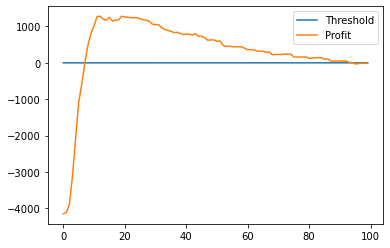

In [79]:
profits_df.plot()

In [84]:
max_profit = profits_df["Profit"].max()
max_profit

1280.0

In [87]:
max_profit_row = profits_df.loc[profits_df['Profit'] == max_profit]
max_profit_row

,Threshold,Profit
12,0.12,1280.0
19,0.19,1280.0


In [63]:
# Define custom predict function
def custom_predict(X, custom_threshold):
    probs = best_model.predict_proba(X) # Get probability of each sample being classified as 0 or 1
    positive_probs = probs[:, 1] # Only keep probabilities of class [1]
    return 1* (positive_probs > custom_threshold)
    
    
custom_prediction = custom_predict(X=X_test, custom_threshold=0.036964) # Update predictions 
custom_prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

### Question 3.5 (5 points)

Now train a random forest model, with 10 decision trees and max_depth=2, what is the profit that can be achieved given the threshold that you identified earlier? Do you need to increase or decrese the threshold to maximize the profit using random forest model? Explain your result.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=2)

random_forest.fit(X_train, y_train)

y_pred_probas_negative, y_pred_probas_positive = rf_model.predict_proba(X_test).T

custom_prediction_rf = 1* (y_pred_probas_positive > optimal_threshold)

tn, fp, fn, tp = confusion_matrix(y_test, custom_prediction_rf).ravel()
profit_thershold_df = profit_function(tp=tp, fp=fp, earning=50, cost=10)
profit_thershold_df